In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('accidents_daily.csv', index_col='date')
df.index = pd.to_datetime(df.index)
df

,y
date,
2016-01-01,450
2016-01-02,148
2016-01-03,99
2016-01-04,344
2016-01-05,271
...,...
2022-12-27,169
2022-12-28,157
2022-12-29,151


In [16]:
df.describe()

,y
count,2557.000000
mean,276.506453
std,63.604944
min,76.000000
25%,234.000000
50%,283.000000
75%,323.000000
max,548.000000


In [17]:
plt.rcParams["figure.figsize"] = (16,6)  # set size of the following plots (needs to be wide for long datasets)

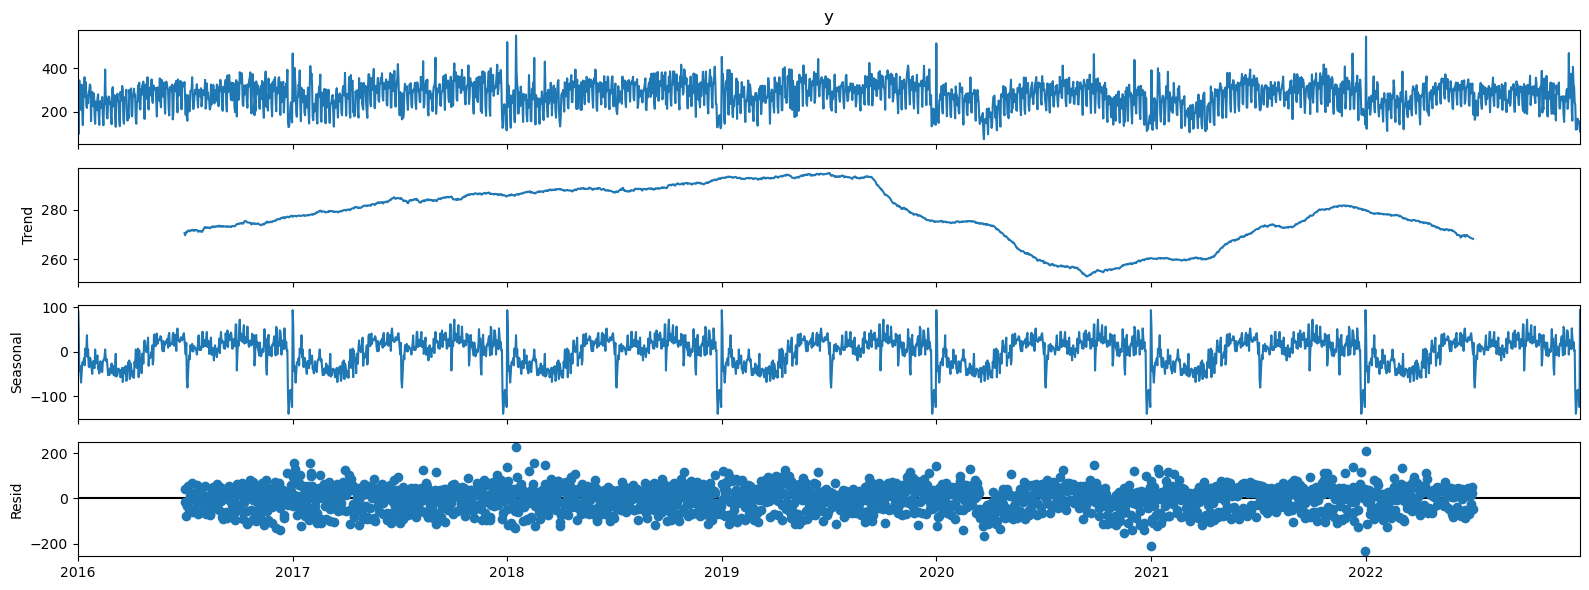

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['y'], period=365).plot()

In [19]:
df['weekday'] = df.index.day_name()
df['month'] = df.index.month_name()
df

,y,weekday,month
date,,,
2016-01-01,450,Friday,January
2016-01-02,148,Saturday,January
2016-01-03,99,Sunday,January
2016-01-04,344,Monday,January
2016-01-05,271,Tuesday,January
...,...,...,...
2022-12-27,169,Tuesday,December
2022-12-28,157,Wednesday,December
2022-12-29,151,Thursday,December


Text(0, 0.5, 'number of accidents')

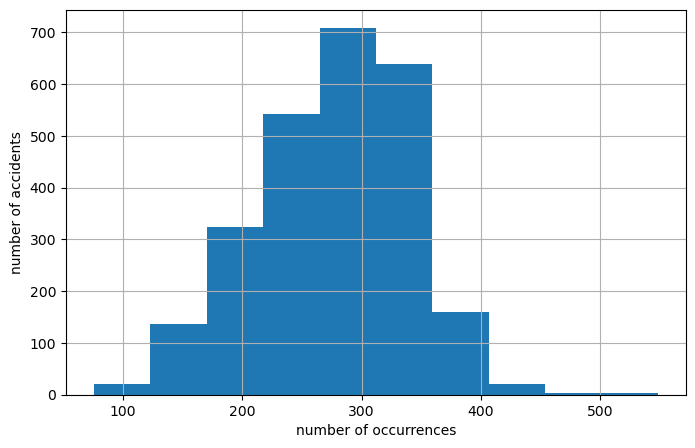

In [31]:
ax = df['y'].hist(figsize=(8,5))
ax.set_xlabel("number of occurrences")
ax.set_ylabel("number of accidents")

Text(0, 0.5, 'number of accidents')

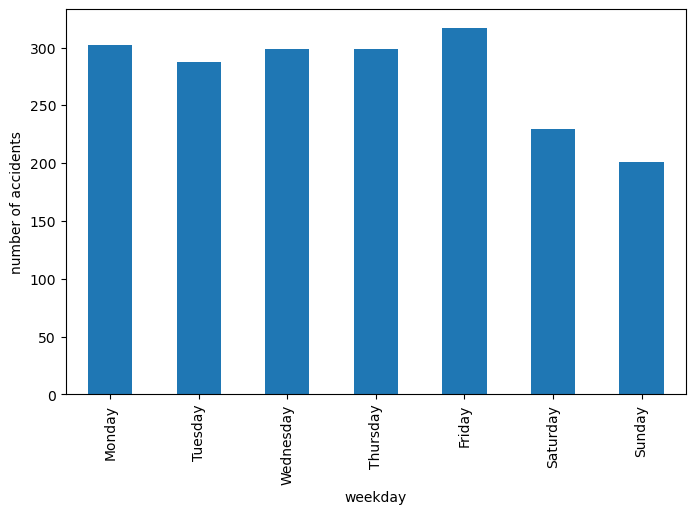

In [32]:
# Define the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'], categories=weekday_order, ordered=True)  # so that plots are ordered on the X axis
ax = df.groupby('weekday')['y'].mean().plot(kind='bar', figsize=(8,5))
ax.set_ylabel("number of accidents")

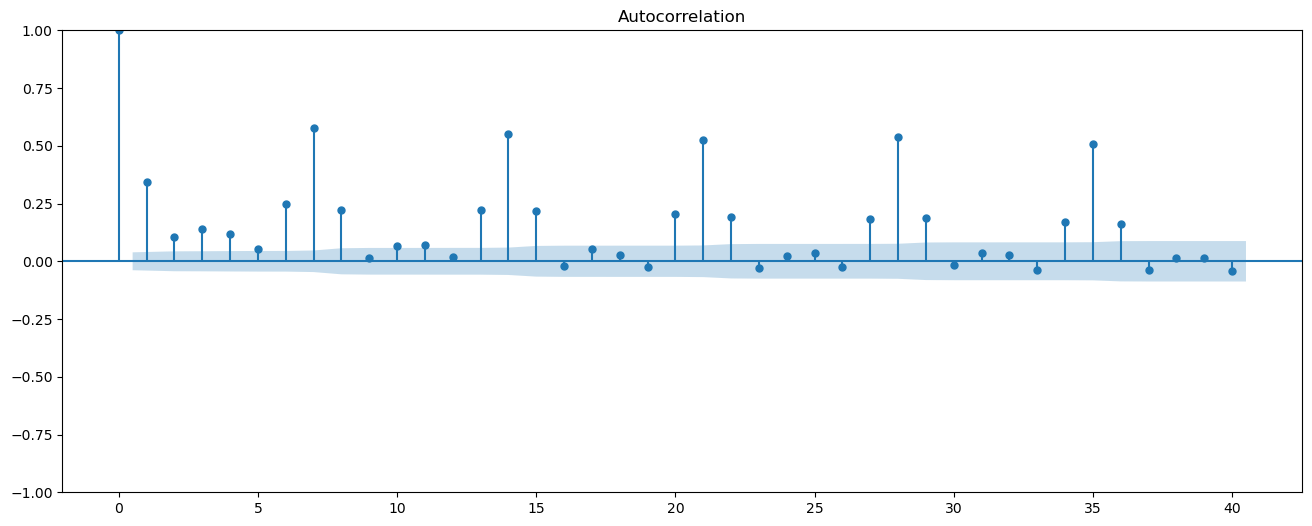

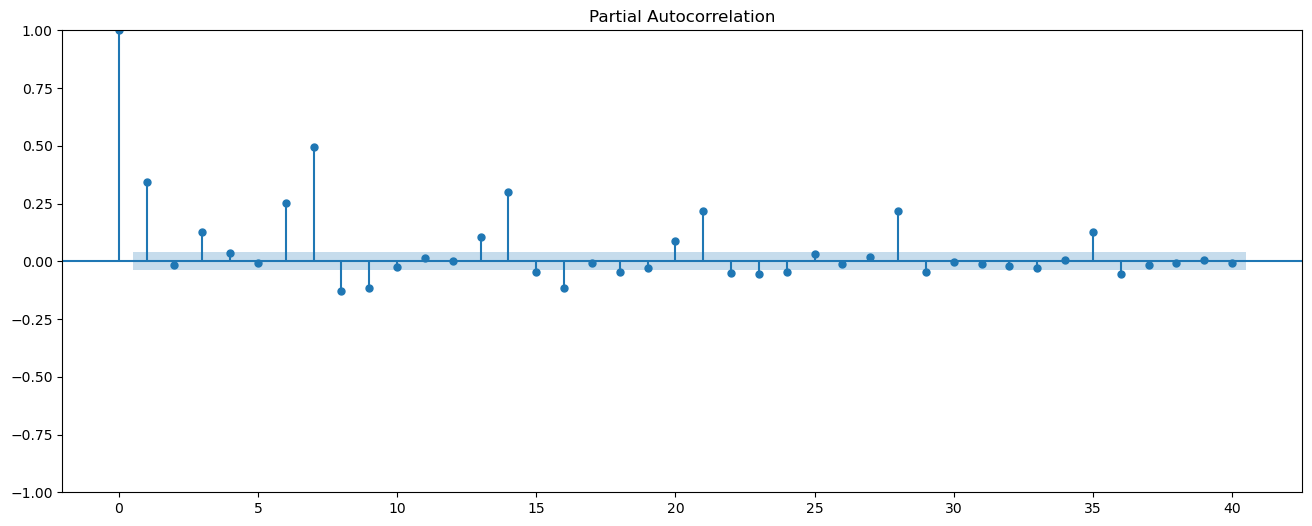

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf = plot_acf(df['y'], lags=40)
pacf = plot_pacf(df['y'], lags=40)